In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kasikrit/idc-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.55G/1.55G [00:30<00:00, 54.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1


In [2]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/idc-dataset'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/idc-dataset


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Code for model_IDC_MobileNetV2.py

In [4]:
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input,concatenate,add
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,SeparableConv2D,Reshape,Permute,multiply
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import time
import os.path
import itertools
#import cv2
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD ,RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
import math
import keras
from tensorflow.keras.regularizers import l2
import os
import keras.backend as K
import tensorflow as TF
from sklearn.utils import class_weight
import numpy as np

64
(None, 9, 9, 64)
96
(None, 9, 9, 96)
120
(None, 9, 9, 120)


Model: "Breast_NET"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 50, 50, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (SeparableConv2D)  │ (None, 25, 25, 64)     │            283 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 25, 25, 64)     │            256 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pool_1_3x3            │ (None, 9, 9, 64)       │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 9, 9, 64)       │          4,224 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 9, 9, 64)       │          4,736 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 9, 9, 64)       │          5,760 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 9, 9, 64)       │            256 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 9, 9, 64)       │            256 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 9, 9, 64)       │            256 │ separable_conv2d_2[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 9, 9, 64)       │              0 │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_2… │
│                           │                        │                │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 9, 9, 64)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 64)             │              0 │ activation[0][0]       │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 1, 64)       │              0 │ global_average_poolin… │
├──────────────────────

 Total params: 135,765 (530.33 KB)

 Trainable params: 133,397 (521.08 KB)

 Non-trainable params: 2,368 (9.25 KB)

None
Number of layers in the base model:  52
Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.
TensorFlow: 2.17.1
Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


FLOPS: 0.00636 G
Loading network.
Class weights: {0: 0.6983908399507885, 1: 1.7601388252704273}
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5157 - loss: 0.9486
Epoch 1: val_loss improved from inf to 0.68278, saving model to /content/drive/MyDrive/IDC_VGG19/checkpoints/model_idc_VGG19.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5183 - loss: 0.9443 - val_accuracy: 0.7217 - val_loss: 0.6828
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7673 - loss: 0.5724
Epoch 2: val_loss did not improve from 0.68278
39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7676 - loss: 0.5720 - val_accuracy: 0.0000e+00 - val_loss: 0.7332
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8024 - loss: 0.4975
Epoch 3: val_loss improved from 0.68278 to 0.67235, saving model to /content/drive/MyDrive/IDC_VGG19/checkpoints/model_idc_VGG19.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8025 - loss: 0.4972 - val_accuracy: 0.7217 - val_loss: 0.6723
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8130 - loss: 0.4565
Epoch 4: val_loss did not improve from 0.67235
39/39 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8129 - loss: 0.4566 - val_accuracy: 0.0000e+00 - val_loss: 0.7514
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8127 - loss: 0.4547
Epoch 5: val_loss improved from 0.67235 to 0.66634, saving model to /content/drive/MyDrive/IDC_VGG19/checkpoints/model_idc_VGG19.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8129 - loss: 0.4544 - val_accuracy: 0.7217 - val_loss: 0.6663
Training plot saved to: /content/drive/MyDrive/IDC_VGG19/model_training_plot.png


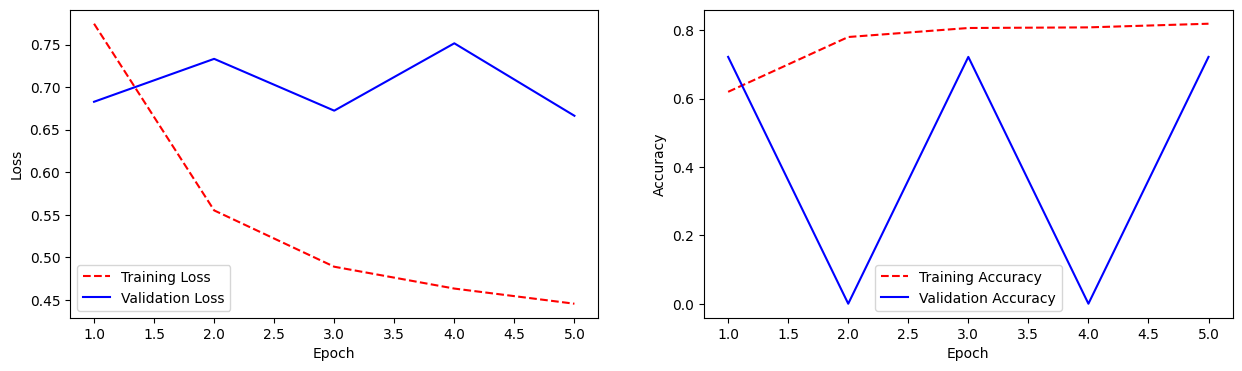

In [5]:
# Define dataset paths (update paths to fetch data from Google Drive)
train_data_dir = '/content/datasets/idc-dataset/1/IDC/training'
valid_data_dir = '/content/datasets/idc-dataset/1/IDC/validation'

# Define output paths
output_dir = '/content/drive/MyDrive/IDC_VGG19'
checkpoints_dir = os.path.join(output_dir, 'checkpoints')
logs_dir = os.path.join(output_dir, 'logs')
image_save_path = os.path.join(output_dir, 'model_training_plot.png')

# Ensure output directories exist
os.makedirs(checkpoints_dir, exist_ok=True)
os.makedirs(logs_dir, exist_ok=True)

batch_size = 256
checkpointer = ModelCheckpoint(
    filepath=os.path.join(checkpoints_dir, 'model_idc_VGG19.keras'),
    verbose=1,
    save_best_only=True
)

early_stopper = EarlyStopping(monitor='val_loss', patience=30)

tensorboard = TensorBoard(log_dir=logs_dir)
timestamp = time.time()
csv_logger = CSVLogger(os.path.join(logs_dir, f'model_idc_VGG19-training-{timestamp}.log'))

def get_generators():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.05,
        rotation_range=20,
        shear_range=0.05,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        shuffle=True,
        color_mode="rgb",
        classes=['0', '1'],
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        color_mode="rgb",
        shuffle=False,
        classes=['0', '1'],
        class_mode='categorical'
    )

    return train_generator, validation_generator

# Model definition and utilities
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

def _tensor_shape(tensor):
    return getattr(tensor, '_shape_val') if TF else getattr(tensor, '_keras_shape')

def CAM(input_tensor):

    init = input_tensor
    print(init.shape)
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    filters =init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = SeparableConv2D(filters, (1, 1), padding='same', activation='relu')(se)
    se=BatchNormalization()(se)
    se = SeparableConv2D(filters, (1, 1), padding='same', activation='relu')(se)

    if K.image_data_format() == 'channels_first':
        se = Permute((3, 1, 2))(se)

    x = add([init, se])
    return x

def grouped_convolutions(x,
                     filters_1,
                     filters_2,
                     filters_3):

    conv_1 = SeparableConv2D(filters_1, (1, 1), padding='same', activation='relu')(x)

    conv_1_b = BatchNormalization()(conv_1)



    conv_2 = SeparableConv2D(filters_2, (3, 3), padding='same', activation='relu')(x)
    conv_2_b = BatchNormalization()(conv_2)



    conv_3= SeparableConv2D(filters_3, (5, 5), padding='same', activation='relu')(x)
    conv_3_b = BatchNormalization()(conv_3)




    output = add([conv_1_b, conv_2_b, conv_3_b])
    print(output.shape[-1])

    return output

def Breast_NET_block(x, filters_1x1, filters_3x3, filters_5x5):

    x_0 = grouped_convolutions(x,
                         filters_1x1,
                         filters_3x3,
                         filters_5x5)


    x_2 = keras.layers.Activation("relu")(x_0)


    x_=CAM(x_2)

    return keras.layers.Activation("relu")(x_)

def srima():
    input_layer = Input(shape=(50, 50, 3))

    # First Convolutional Layer
    x = SeparableConv2D(64, (3, 3),
                        padding='same',
                        strides=(2, 2),
                        activation='relu',
                        name='conv_1')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), padding='same', name='max_pool_1_3x3')(x)

    # Breast_NET Blocks
    x = Breast_NET_block(x, filters_1x1=64, filters_3x3=64, filters_5x5=64)
    x = Breast_NET_block(x, filters_1x1=96, filters_3x3=96, filters_5x5=96)
    x = Breast_NET_block(x, filters_1x1=120, filters_3x3=120, filters_5x5=120)

    # Global Average Pooling and Dense Layers
    x1 = GlobalAveragePooling2D(name='avg_pool')(x)
    x1 = Dropout(0.4)(x1)
    x1 = Dense(2, activation='softmax', name='output')(x1)

    # Build the Model
    model = Model(input_layer, x1, name='Breast_NET')

    # Model Summary
    print(model.summary())
    print("Number of layers in the base model: ", len(model.layers))

    return model

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00001)

def train_model(model, nb_epoch, generators, callbacks=[]):
    train_generator, validation_generator = generators

    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model._get_distribution_strategy = lambda: None

    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
    print("Class weights:", class_weights)
    classWeight = dict()

    his = model.fit(
        train_generator,
        steps_per_epoch=10000 // batch_size,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.filenames) // batch_size,
        epochs=nb_epoch,
        callbacks=callbacks
    )

    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    training_loss = his.history['loss']
    validation_loss = his.history['val_loss']
    training_accuracy = his.history['accuracy']
    validation_accuracy = his.history['val_accuracy']
    epoch_count = range(1, len(training_loss) + 1)

    axs[0].plot(epoch_count, training_loss, 'r--')
    axs[0].plot(epoch_count, validation_loss, 'b-')
    axs[0].legend(['Training Loss', 'Validation Loss'])
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")

    axs[1].plot(epoch_count, training_accuracy, 'r--')
    axs[1].plot(epoch_count, validation_accuracy, 'b-')
    axs[1].legend(['Training Accuracy', 'Validation Accuracy'])
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")

    fig.savefig(image_save_path)
    print(f"Training plot saved to: {image_save_path}")

    return model

def main(weights_file):
    model = srima()
    generators = get_generators()

    import tensorflow as tf
    from tensorflow.python.profiler.model_analyzer import profile
    from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
    print('TensorFlow:', tf.__version__)

    generators = get_generators()

    forward_pass = tf.function(
        model.call,
        input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

    graph_info = profile(forward_pass.get_concrete_function().graph,
                            options=ProfileOptionBuilder.float_operation())


    flops = graph_info.total_float_ops // 2
    print(f"FLOPS: {flops / 10 ** 9:.03} G")

    if weights_file is None:
        print("Loading network.")
        model = train_model(model, 5, generators,
                            [checkpointer, tensorboard, csv_logger, early_stopper])
    else:
        print(f"Loading saved model: {weights_file}.")
        model.load_weights(weights_file)

if __name__ == '__main__':
    weights_file = None
    main(weights_file)